In [1]:
# Importação das bibliotecas 
%pylab inline
import copy

Populating the interactive namespace from numpy and matplotlib


## Problemas

#### Escreva uma função que calcule o histograma da retina. Teste a sua função em alguns casos. Visualize o histograma identificando e fazendo a correspondência entre zonas no histograma e zonas na imagem.

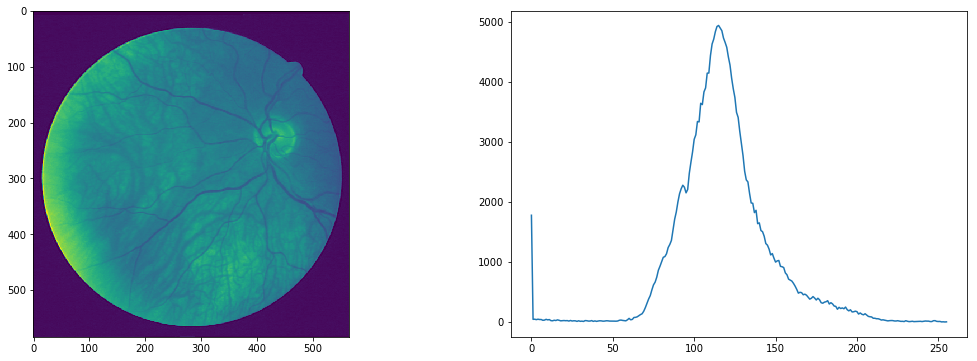

In [3]:
def histRetina():
    path = 'DRIVE/training/'
    maskRetina = imread(path + "mask/23_training_mask.gif")
    image = imread(path + "images/23_training.tif")

    im_g = copy.copy(image[:,:,1])
    count = zeros(256)
    
    # A zona da retina corresponde à zona branca da mascara da retina -> maskRetina[i,j] > 0
    for i in range(im_g.shape[0]):
        for j in range(im_g.shape[1]):
            if maskRetina[i,j] > 0:
                count[ im_g[i,j] ] += 1;

    _, ax = subplots(1,2,figsize = (18,6))
    ax[0].imshow(im_g)
    ax[1].plot(count)
    
histRetina()

#### Escreva uma função que calcule o histograma dos vasos da retina. Teste a sua função em alguns casos. Visualize o histograma identificando e fazendo a correspondência entre zonas no histograma e zonas na imagem.

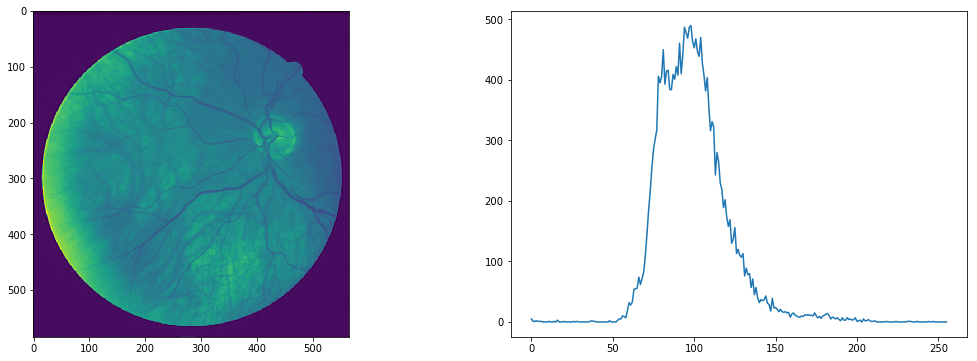

In [3]:
#Versão inicial 
''' 
def histVasosRetina():
    path = 'DRIVE/training/'
    mask = imread(path + '1st_manual/21_manual1.gif')
    image = imread(path + "images/21_training.tif")

    im_g = image[:,:,1]

    count = zeros(256)

    for i in range(im_g.shape[0]):
        for j in range(im_g.shape[1]):
            if mask[i,j] > 0:
                count[ im_g[i,j] ] += 1;
    
    _ ,ax = subplots(1,2,figsize = (18,6))
    ax[0].imshow(im_g)
    ax[1].plot(count)
    
histVasosRetina()
'''

def histVasosRetina():
    path = 'DRIVE/training/'
    maskVasos = imread(path + '1st_manual/23_manual1.gif')
    image = imread(path + "images/23_training.tif")

    im_g = copy.copy(image[:,:,1])
    
    # Os vasos da retina correspondem à zona branca da mascara dos vasos -> maskVasos[i,j] > 0 
    id_l, id_c = nonzero(maskVasos > 0)
    count = zeros(256)
    for i,j in zip(id_l, id_c):
        count[ im_g[i,j] ] += 1
    
    f, ax = subplots(1,2,figsize = (18,6))
    ax[0].imshow(im_g)
    ax[1].plot(count)
    
histVasosRetina()

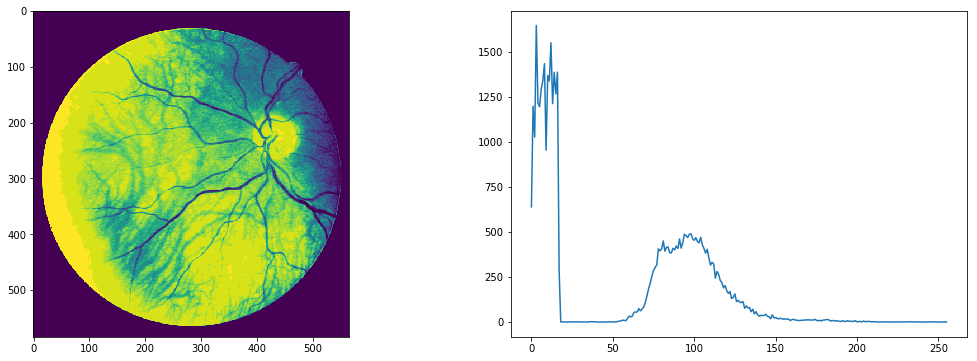

In [10]:
def eq_histograma():
    path = 'DRIVE/training/'
    maskVasos = imread(path + '1st_manual/23_manual1.gif')
    image = imread(path + "images/23_training.tif")

    im_g = copy.copy(image[:,:,1])
    L,C = im_g.shape
    H = zeros(256)
    H_c = zeros_like(H)
    Tp = zeros_like(H)
    
    # Os vasos da retina correspondem à zona branca da mascara dos vasos -> maskVasos[i,j] > 0 
    id_l, id_c = nonzero(maskVasos > 0)
    count = zeros(256)
    for i,j in zip(id_l, id_c):
        count[ im_g[i,j] ] += 1
        H[im_g[i,j]] += 1
    
    H_c[0] = H[0]
    for i in range(1,255):
        H_c[i] = H_c[i-1] + H[i]
    
    for i in range(0,255):
        Tp[i] = round(((255-1)/(L*C))*H_c[i])
    
    for i in range(0,L):
        for j in range(0,C):
            im_g[i,j] = Tp[im_g[i,j]]
    
    for i,j in zip(id_l, id_c):
        count[ im_g[i,j] ] += 1
        H[im_g[i,j]] += 1
    
    f, ax = subplots(1,2,figsize = (18,6))
    ax[0].imshow(im_g)
    ax[1].plot(count)
    
eq_histograma()

#### Escreva uma função que calcule o histograma do fundo da retina. Teste a sua função em alguns casos. Visualize o histograma identificando e fazendo a correspondência entre zonas no histograma e zonas na imagem.

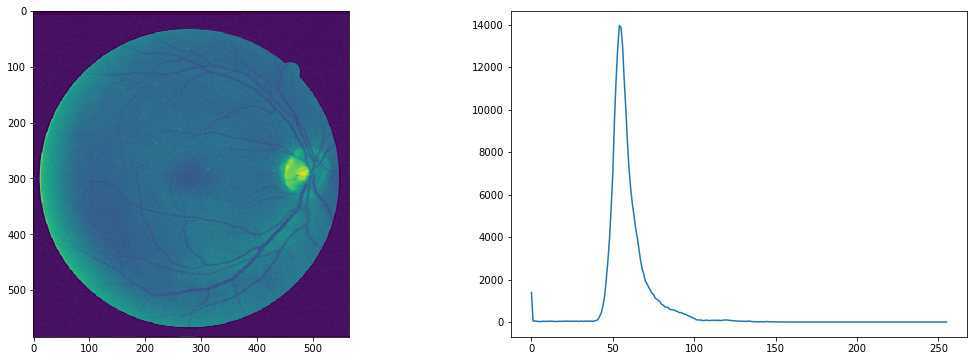

In [4]:
def histFundoRetina():
    path = 'DRIVE/training/'
    maskVasos = imread(path + '1st_manual/30_manual1.gif')
    maskRetina = imread(path + "mask/30_training_mask.gif")
    image = imread(path + "images/30_training.tif")
    
    im_g = copy.copy(image[:,:,1])
    count = zeros(256)
    
    # O fundo da retina corresponde à zona branca da mascara da retina -> maskRetina[i,j] > 0 
    # o fundo da retina corresponde á zona preta da mascara dos vasos -> maskVasos[i,j] = 0 
    for i in range(im_g.shape[0]):
        for j in range(im_g.shape[1]):
            if((maskRetina[i,j] > 0) and (maskVasos[i,j] == 0)):
                count[ im_g[i,j] ] += 1;

    f, ax = subplots(1,2,figsize = (18,6))
    ax[0].imshow(im_g)
    ax[1].plot(count)
    
histFundoRetina()

#### Escreva uma função que permita alterar o brilho dos vasos da retina. Teste a sua função em alguns casos. Visualize o histograma identificando e fazendo a correspondência entre zonas no histograma e zonas na imagem. Repita para o fundo.

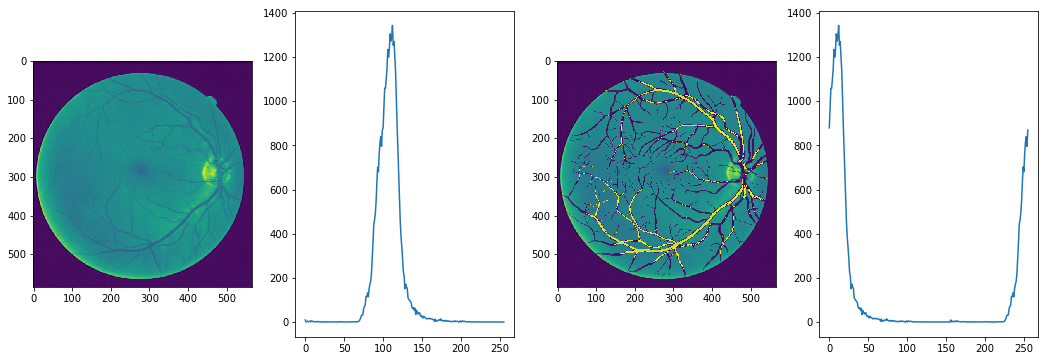

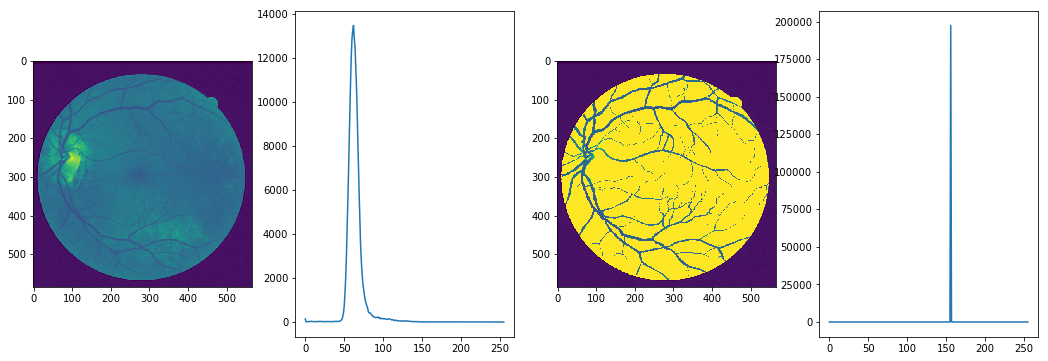

In [7]:
def brilhoVasosRetina():
    path = 'DRIVE/training/'
    image = imread(path + "images/24_training.tif")
    maskVasos = imread(path + '1st_manual/24_manual1.gif')
    # Os vasos da retina correspondem à zona branca da mascara dos vasos -> maskVasos[i,j] > 0 
    
    im_gFinal = copy.copy(image[:,:,1])
    im_gInicial = copy.copy(image[:,:,1])
       
    #Paramentro para aumentar (deslocar esquerda) ou diminuir (deslocar direita) a luminosidade da imagem
    alfa = -100
    
    # Histograma da imagem inicial 
    countPre = zeros(256)
    # Histograma da imagem com brilho nos vasos alterado 
    countPos = zeros(256)
    for i in range(im_gFinal.shape[0]):
        for j in range(im_gFinal.shape[1]):
            if(maskVasos[i,j] > 0):
                countPre[ im_gInicial[i,j] ] += 1
                im_gFinal[i,j] += alfa
                countPos[ im_gFinal[i,j] ] += 1
                
    f, ax = subplots(1,4,figsize = (18,6))
    ax[0].imshow(im_gInicial)
    ax[1].plot(countPre)
    ax[2].imshow(im_gFinal)
    ax[3].plot(countPos)
    
brilhoVasosRetina()

def brilhoFundoRetina():
    path = 'DRIVE/training/'
    image = imread(path + "images/26_training.tif")
    maskVasos = imread(path + '1st_manual/26_manual1.gif')
    maskRetina = imread(path + "mask/26_training_mask.gif")
    # O fundo da retina corresponde à zona preta da mascara dos vasos -> maskVasos[i,j] = 0
    # e á zona branca da mascara da retina maskRetina[i,j] > 0
    
    im_gFinal = copy.copy(image[:,:,1])
    im_gInicial = copy.copy(image[:,:,1])
       
    #Paramentro para aumentar a luminosidade (deslocar histograma para esquerda) 
    # ou diminuir a luminusidade (deslocar histograma para direita)
    alfa = -100
    
    # Histograma da imagem inicial 
    countPre = zeros(256)
    # Histograma da imagem com brilho nos vasos alterado 
    countPos = zeros(256)
    for i in range(im_gFinal.shape[0]):
        for j in range(im_gFinal.shape[1]):
            if(maskVasos[i,j] == 0 and maskRetina[i,j] > 0 ):
                countPre[ im_gInicial[i,j] ] += 1
                im_gFinal[i,j] = alfa
                countPos[ im_gFinal[i,j] ] += 1
                
    f, ax = subplots(1,4,figsize = (18,6))
    ax[0].imshow(im_gInicial)
    ax[1].plot(countPre)
    ax[2].imshow(im_gFinal)
    ax[3].plot(countPos)
    
brilhoFundoRetina()

#### Escreva uma função que permita alterar o contraste dos vasos da retina. Teste a sua função em alguns casos. Visualize o histograma identificando e fazendo a correspondência entre zonas no histograma e zonas na imagem. Repita para o fundo.

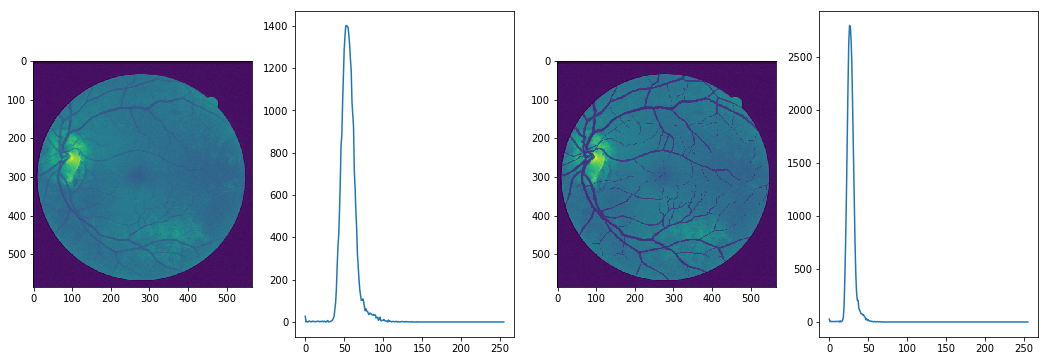

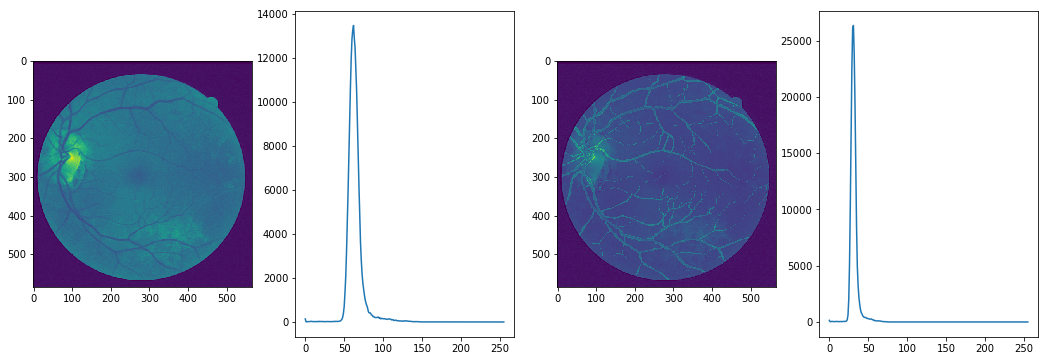

In [12]:
def ContrasteVasosRetina(alfa):
    path = 'DRIVE/training/'
    image = imread(path + "images/26_training.tif")
    maskVasos = imread(path + '1st_manual/26_manual1.gif')
    
    im_gInicial = copy.copy(image[:,:,1])
    im_gFinal = copy.copy(image[:,:,1])
    
    # Histograma da imagem inicial 
    countPre = zeros(256)
    # Histograma da imagem com brilho nos vasos alterado 
    countPos = zeros(256)
    for i in range(im_gFinal.shape[0]):
        for j in range(im_gFinal.shape[1]):
            if(maskVasos[i,j] > 0):
                countPre[ im_gInicial[i,j] ] += 1     
                im_gFinal[i,j] *= alfa
                countPos[ im_gFinal[i,j] ] += 1
                
    _, ax = subplots(1,4,figsize = (18,6))
    ax[0].imshow(im_gInicial)
    ax[1].plot(countPre)
    ax[2].imshow(im_gFinal)
    ax[3].plot(countPos)
    
ContrasteVasosRetina(0.5)

def ContrasteFundoRetina(alfa):
    path = 'DRIVE/training/'
    image = imread(path + "images/26_training.tif")
    maskVasos = imread(path + '1st_manual/26_manual1.gif')
    maskRetina = imread(path + "mask/26_training_mask.gif")

    im_gInicial = copy.copy(image[:,:,1])
    im_gFinal = copy.copy(image[:,:,1])
    
    
    # Histograma da imagem inicial 
    countPre = zeros(256)
    # Histograma da imagem com brilho nos vasos alterado 
    countPos = zeros(256)
    
    for i in range(im_gFinal.shape[0]):
        for j in range(im_gFinal.shape[1]):
            if(maskVasos[i,j] == 0 and maskRetina[i,j] > 0 ):
                countPre[ im_gInicial[i,j] ] += 1     
                im_gFinal[i,j] *= alfa
                countPos[ im_gFinal[i,j] ] += 1
                
    _, ax = subplots(1,4,figsize = (18,6))
    ax[0].imshow(im_gInicial)
    ax[1].plot(countPre)
    ax[2].imshow(im_gFinal)
    ax[3].plot(countPos)
    
ContrasteFundoRetina(0.5)


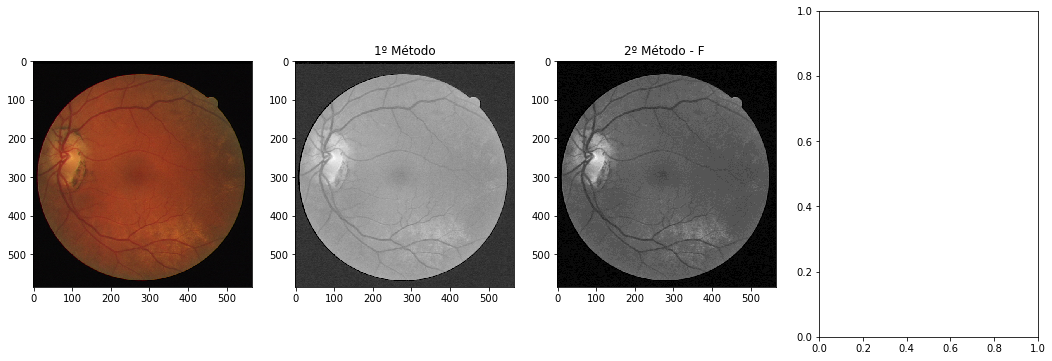

In [17]:
def ContrasteFundoRetina(alfa = 1, C=5):
    path = 'DRIVE/training/'
    image = imread(path + "images/26_training.tif")
    maskVasos = imread(path + '1st_manual/26_manual1.gif')
    maskRetina = imread(path + "mask/26_training_mask.gif")
    gray()
    img1 = np.array(image[:,:,1])
    img2 = np.array(image[:,:,1])
    
    I_max = img1.max()
    for i in range(0, img1.shape[0]):
        for j in range(0, img1.shape[1]):
            img1[i,j] = C * pow( (img2[i,j] + 1e-9), alfa)
            img2[i,j] = I_max * pow( (img1[i,j] / I_max), 1/alfa)

    
    _, ax = subplots(1,4,figsize = (18,6))
    ax[0].imshow(image)
    ax[1].imshow(img1)
    ax[1].set_title("1º Método")
    ax[2].imshow(img2)
    ax[2].set_title("2º Método - F ")
    
ContrasteFundoRetina(alfa=0.5, C=5)